2.1 Wyszukiwanie\
Zaimplementuj funkcję szukającą największego wspólnego dzielnika dwóch liczb. Zrób to na dwa sposoby.\
    • Z wykorzystaniem rozkładu na czynniki pierwsze aczp(x, y).\
    • Z wykorzystaniem algorytmu Euklidesa aeuc(x, y).

In [2]:
from math import sqrt
import plotly.express as px

In [3]:
def czp(p):
    devidors = []
    if p == 1:
        return [1]
    else:
        devidors.append(1)

    for n in range(2, int(sqrt(p))+1):

        if p % n == 0:
            devidors.append(n)
            devs = czp(n)
            
            for i in devs:
                if i not in devidors:
                    devidors.append(i)
    
    
    return devidors

def aczp(x, y):
    dev_x = czp(x)
    dev_y = czp(y)
    dev_x.reverse()
    dev_y.reverse()

    if len(dev_x) < len(dev_y):
        dev_x, dev_y = dev_y, dev_x

    for i in range(len(dev_y)):
        if dev_y[i] in dev_x:
            return dev_y[i]
    


def aeuc(x, y):
    if y == 0:
        return x
    else: 
        return aeuc(y, x%y)


print(aczp(6, 12))
print(aeuc(1248, 8848))

2
16


In [3]:
aeuc(4, 9)

1

In [4]:
from time import time

aczp_time = list()
aeuc_time = list()

N = 1000

for k in range(N):
    start = time()
    for i in range(1, k):
        for j in range(1, 7):
            aczp(i, j)

    aczp_time.append(time() - start)

    start = time()
    for i in range(1, k):
        for j in range(1, 7):
            aczp(i, j)

    aeuc_time.append(time() - start)



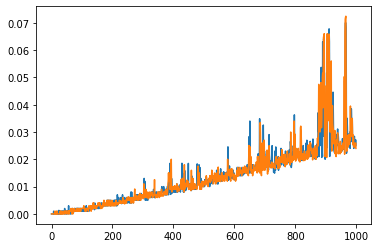

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(aczp_time)
plt.plot(aeuc_time)


In [61]:
d = {
    'aczp': aczp_time,
    'aeuc': aeuc_time
}
df = pd.DataFrame(d)

In [62]:


fig = px.line(data_frame=df)
fig.update_layout(
    title='Czas wykonywania Algorytmów NWD'
)
fig.update_yaxes(title='czas [s]')
fig.show()